___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest the data to notebook

In [90]:
df = pd.read_csv("heart.csv").copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [93]:
df.shape

(303, 14)

In [94]:
df['cp']=df['cp'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})
df['restecg']=df['restecg'].replace({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'})
df['slope']=df['slope'].replace({1:'upsloping',2:'flat',3:'downsloping'})
df['thal']=df['thal'].replace({3:'normal',6:'fixed defect',7:'reversable defect'})
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,asymptomatic,145,233,1,normal,150,0,2.300,0,0,1,1
1,37,1,non-anginal pain,130,250,0,having ST-T wave abnormality,187,0,3.500,0,0,2,1
2,41,0,atypical angina,130,204,0,normal,172,0,1.400,flat,0,2,1
3,56,1,atypical angina,120,236,0,having ST-T wave abnormality,178,0,0.800,flat,0,2,1
4,57,0,typical angina,120,354,0,having ST-T wave abnormality,163,1,0.600,flat,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,typical angina,140,241,0,having ST-T wave abnormality,123,1,0.200,upsloping,0,normal,0
299,45,1,asymptomatic,110,264,0,having ST-T wave abnormality,132,0,1.200,upsloping,0,normal,0
300,68,1,typical angina,144,193,1,having ST-T wave abnormality,141,0,3.400,upsloping,2,normal,0
301,57,1,typical angina,130,131,0,having ST-T wave abnormality,115,1,1.200,upsloping,1,normal,0


# EDA

In [95]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,non-anginal pain,138,175,0,having ST-T wave abnormality,173,0,0.000,flat,4,2,1


In [96]:
df.drop_duplicates(ignore_index = True, inplace = True)

In [97]:
df.duplicated().value_counts()

False    302
dtype: int64

In [98]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [99]:
df["target"].value_counts()  # dengeli bir data diyebiliriz.

1    164
0    138
Name: target, dtype: int64

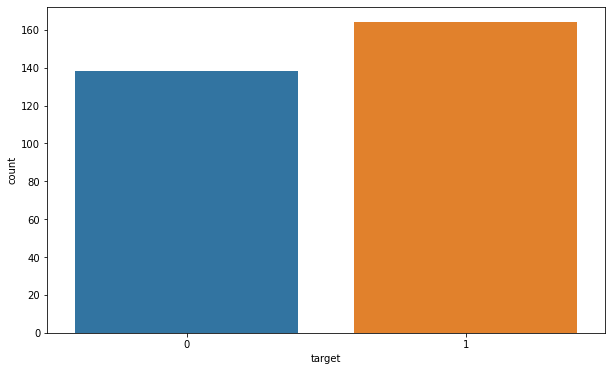

In [100]:
sns.countplot(df['target']);

<AxesSubplot:>

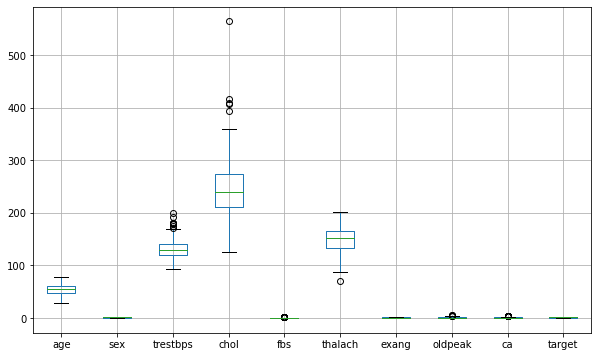

In [102]:
df.boxplot(column=['age', 'sex', 'trestbps', 'chol', 'fbs',
       'thalach', 'exang', 'oldpeak', 'ca', 'target'])

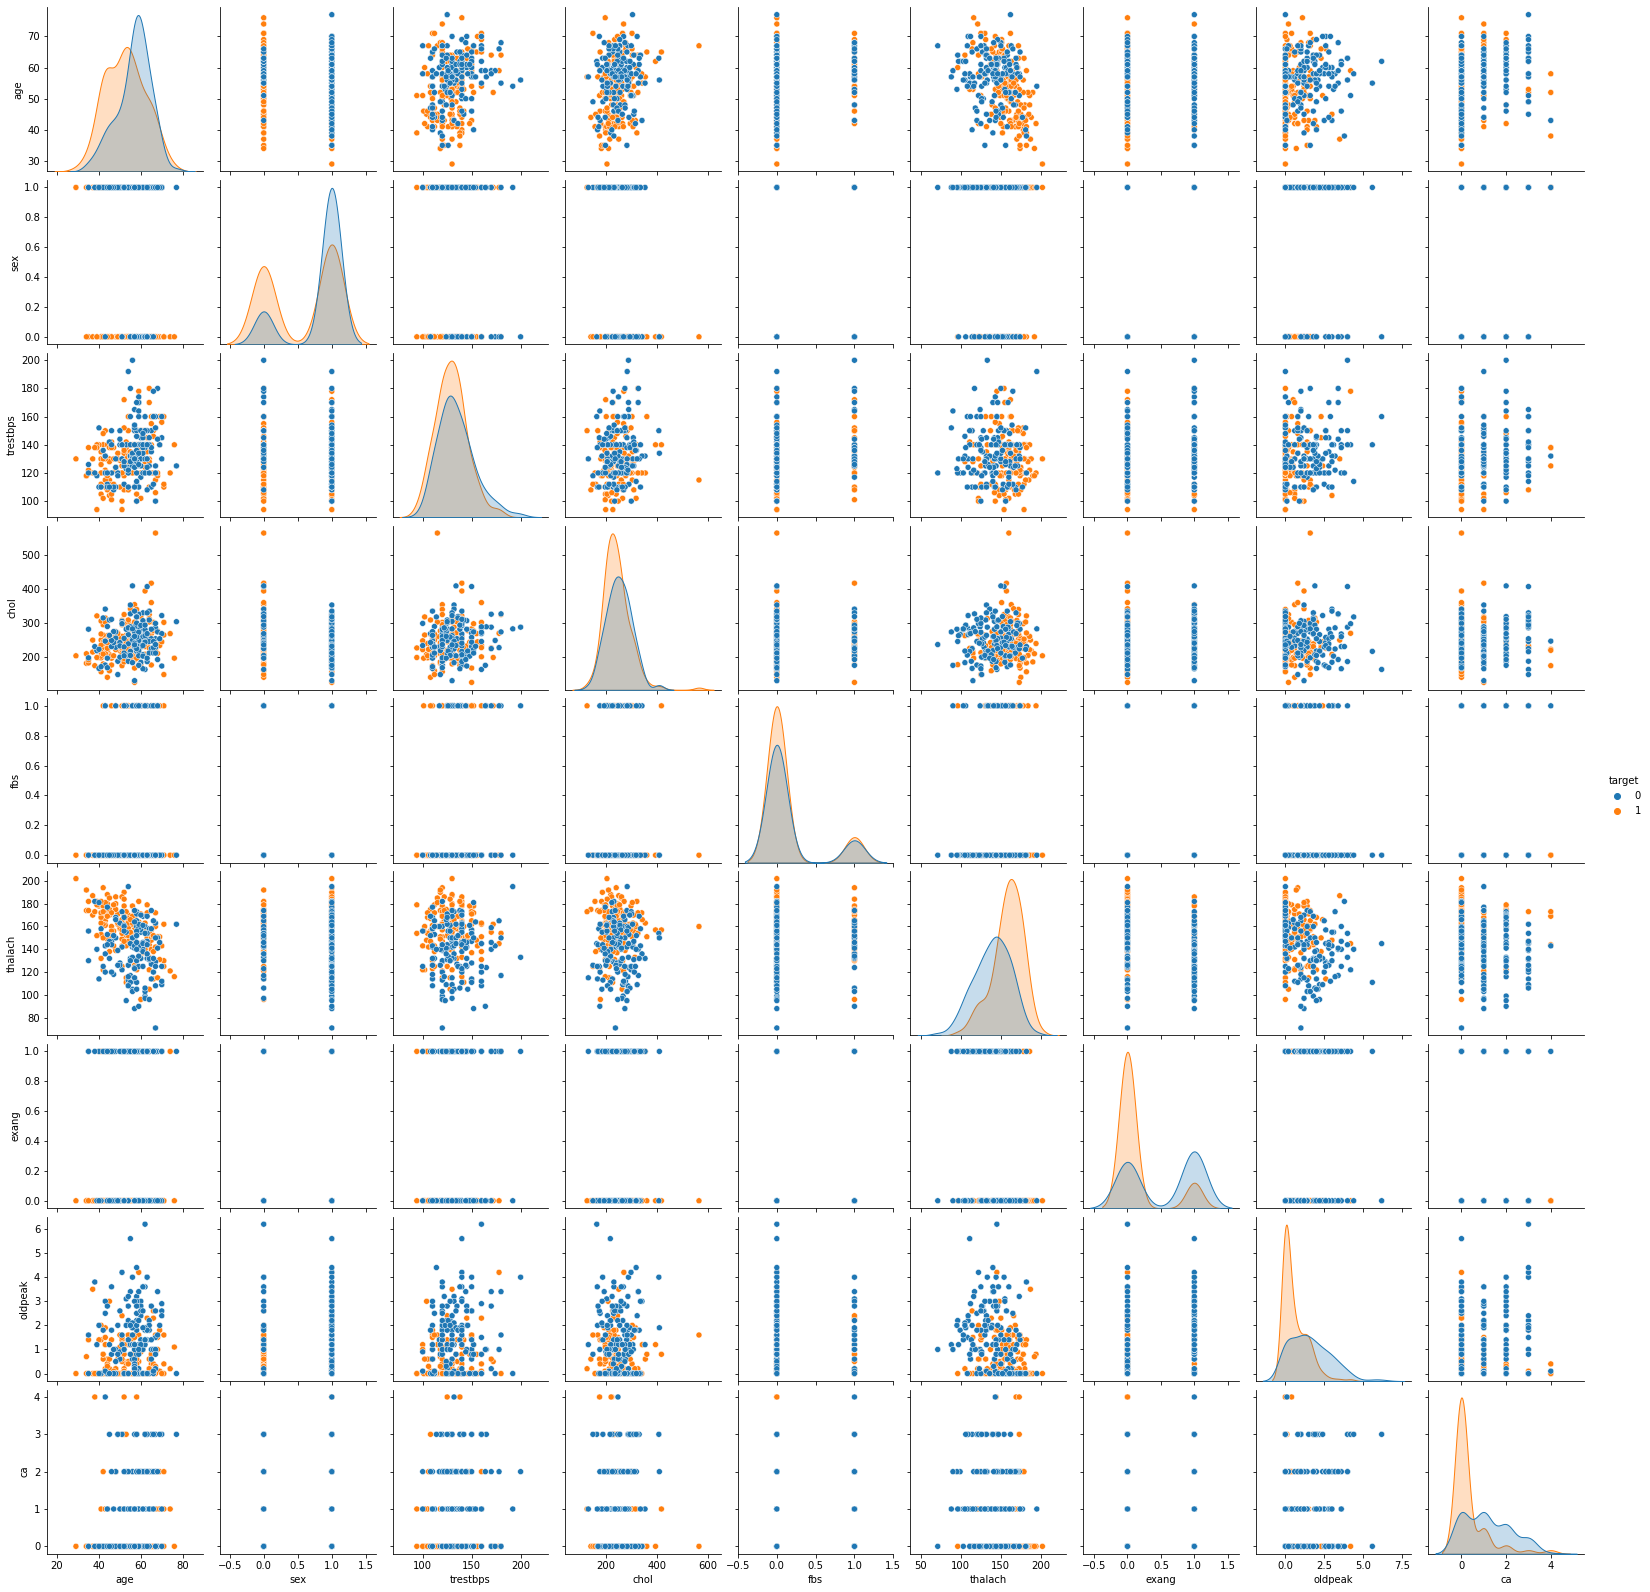

In [105]:
sns.pairplot(df, hue= "target")

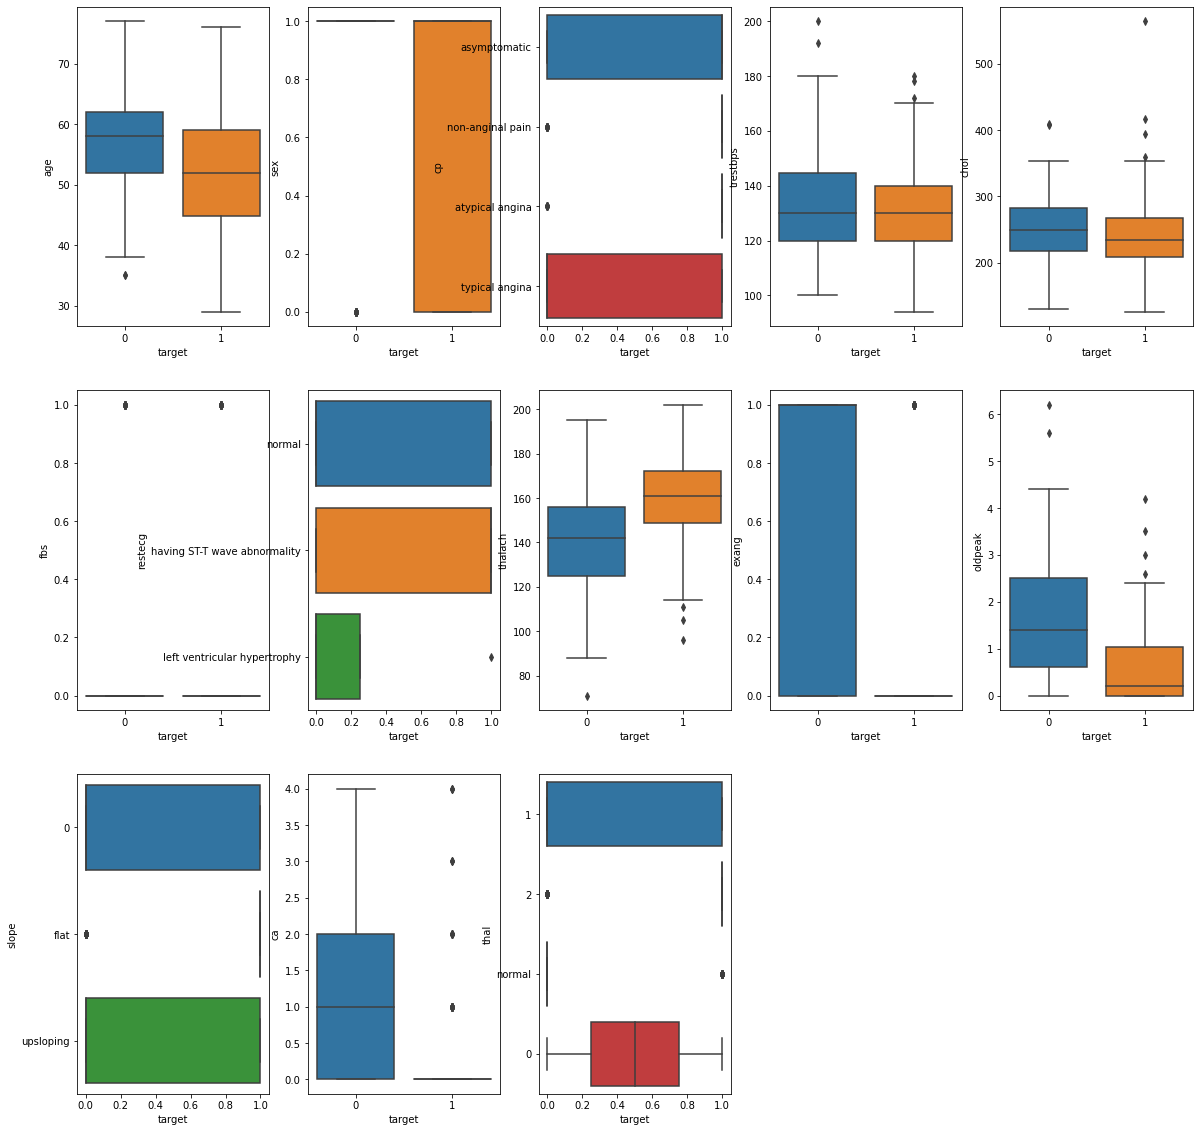

In [106]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "target":
        index += 1
        plt.subplot(3,5,index)
        sns.boxplot(x='target',y=feature,data=df)

<AxesSubplot:>

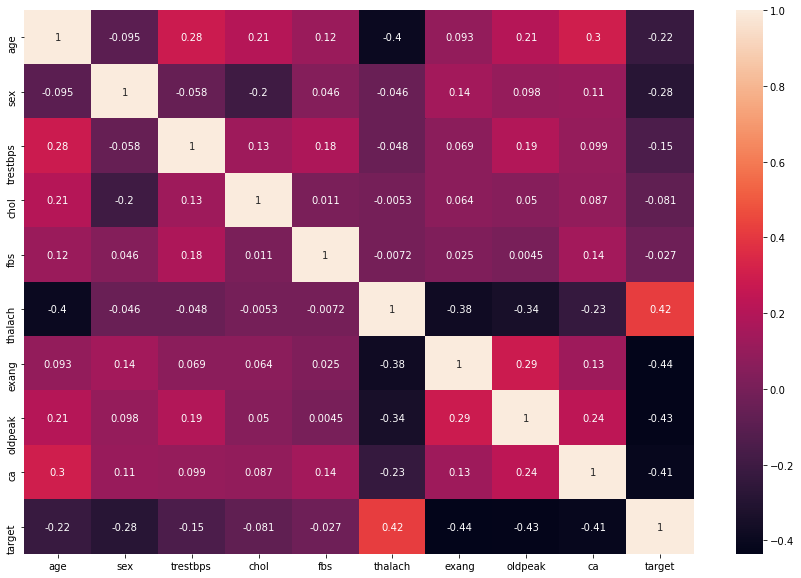

In [107]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),annot = True)  # multicollinearity gözükmüyor.

# Data Preprocessing

In [108]:
df=pd.get_dummies(df,drop_first=True)
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_1,thal_2,thal_normal
0,63,1,145,233,1,150,0,2.300,0,1,0,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.500,0,1,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.400,0,1,1,0,0,0,1,1,0,0,1,0
3,56,1,120,236,0,178,0,0.800,0,1,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.600,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,140,241,0,123,1,0.200,0,0,0,0,1,0,0,0,1,0,0,1
298,45,1,110,264,0,132,0,1.200,0,0,0,0,0,0,0,0,1,0,0,1
299,68,1,144,193,1,141,0,3.400,2,0,0,0,1,0,0,0,1,0,0,1
300,57,1,130,131,0,115,1,1.200,1,0,0,0,1,0,0,0,1,0,0,1


In [109]:
X = df.drop("target", axis = 1)
y = df["target"]

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [112]:
X_train.shape

(256, 19)

In [113]:
X_test.shape

(46, 19)

In [114]:
scaler = MinMaxScaler()

In [115]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

### With Default Parameters

In [117]:
log_model = LogisticRegression().fit(X_train_scaled,y_train)

In [118]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1], dtype=int64)

In [119]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.05915025, 0.94084975],
       [0.19287375, 0.80712625],
       [0.40985212, 0.59014788],
       [0.04669347, 0.95330653],
       [0.9720769 , 0.0279231 ],
       [0.08365927, 0.91634073],
       [0.10755085, 0.89244915],
       [0.97072134, 0.02927866],
       [0.76296567, 0.23703433],
       [0.66165237, 0.33834763],
       [0.75925009, 0.24074991],
       [0.3548664 , 0.6451336 ],
       [0.36287898, 0.63712102],
       [0.70798683, 0.29201317],
       [0.12517465, 0.87482535],
       [0.26271956, 0.73728044],
       [0.01951197, 0.98048803],
       [0.22548666, 0.77451334],
       [0.29850827, 0.70149173],
       [0.97039572, 0.02960428],
       [0.96358381, 0.03641619],
       [0.91803446, 0.08196554],
       [0.49915676, 0.50084324],
       [0.78603188, 0.21396812],
       [0.84067445, 0.15932555],
       [0.0632974 , 0.9367026 ],
       [0.95985128, 0.04014872],
       [0.10114956, 0.89885044],
       [0.92527491, 0.07472509],
       [0.05926601, 0.94073399],
       [0.

In [120]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [121]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[15  4]
 [ 4 23]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        19
           1       0.85      0.85      0.85        27

    accuracy                           0.83        46
   macro avg       0.82      0.82      0.82        46
weighted avg       0.83      0.83      0.83        46


Train_Set
[[ 98  21]
 [ 19 118]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       119
           1       0.85      0.86      0.86       137

    accuracy                           0.84       256
   macro avg       0.84      0.84      0.84       256
weighted avg       0.84      0.84      0.84       256



In [122]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred_proba"] = y_pred_proba[:,1] 
test_data["pred"] = y_pred

In [123]:
test_data.sample(15)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,...,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_1,thal_2,thal_normal,target,pred_proba,pred
98,43,1,130,315,0,162,0,1.900,1,0,...,0,0,1,0,0,1,0,1,0.899,1
237,77,1,125,304,0,162,1,0.000,3,0,...,0,1,1,0,0,1,0,0,0.159,0
19,69,0,140,239,0,151,0,1.800,2,0,...,0,0,1,0,0,1,0,1,0.875,1
156,47,1,130,253,0,179,0,0.000,0,0,...,0,0,1,0,0,1,0,1,0.956,1
16,58,0,120,340,0,172,0,0.000,0,0,...,0,0,1,0,0,1,0,1,0.980,1
70,54,1,120,258,0,147,0,0.400,0,0,...,0,1,0,1,0,0,1,1,0.506,1
157,35,1,122,192,0,174,0,0.000,0,1,...,0,0,1,0,0,1,0,1,0.941,1
56,48,1,122,222,0,186,0,0.000,0,0,...,0,1,1,0,0,1,0,1,0.701,1
266,49,1,118,149,0,126,0,0.800,3,0,...,0,1,1,0,0,1,0,0,0.721,1
186,54,1,124,266,0,109,1,2.200,1,0,...,0,1,0,1,0,0,1,0,0.029,0


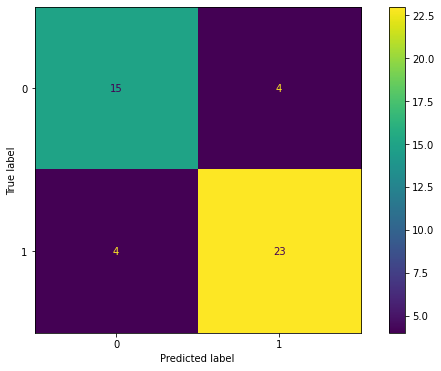

In [124]:
plot_confusion_matrix(log_model, X_test_scaled, y_test)

#### -ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [125]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

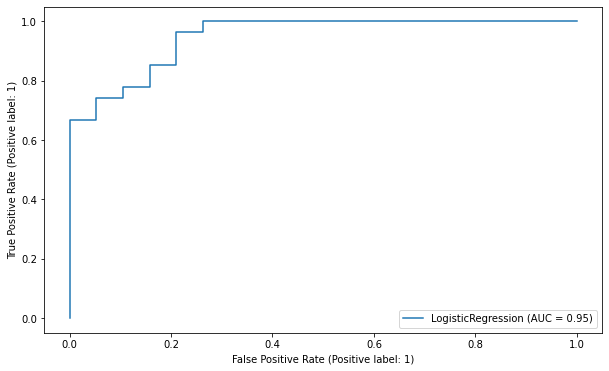

In [126]:
plot_roc_curve(log_model, X_test_scaled, y_test);

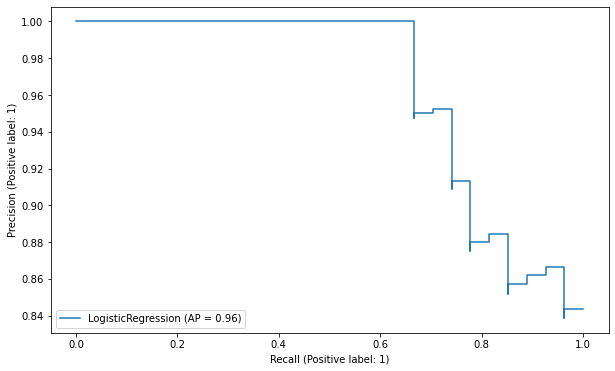

In [127]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

#### - Cross Validate

In [128]:
from sklearn.model_selection import cross_validate

In [130]:
model = LogisticRegression()  # veri dengeli oldugu için herhangi bir parametre kullanma gereksinimi duymadım.
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.821
test_precision   0.841
test_recall      0.831
test_f1          0.831
dtype: float64

#### - With Best Parameters (GridsearchCV)

In [132]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)  # C katsayısına logspace katsayıları koyuldugunda modelin daha iyi sonuçlar döndürüldügünü gözlemleriz.
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",  # istersek recall_0 = make_scorer(recall_score, pos_label =0) da bakabiliriz
                          n_jobs = -1)

In [133]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [134]:
grid_model.best_params_

{'C': 1.8329807108324356,
 'class_weight': None,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [135]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1], dtype=int64)

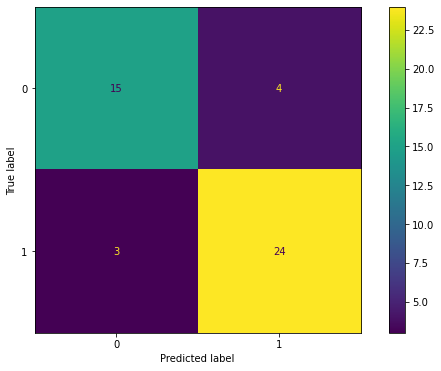

In [136]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)

In [138]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[15  4]
 [ 3 24]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.86      0.89      0.87        27

    accuracy                           0.85        46
   macro avg       0.85      0.84      0.84        46
weighted avg       0.85      0.85      0.85        46


Train_Set
[[ 95  24]
 [ 16 121]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       119
           1       0.83      0.88      0.86       137

    accuracy                           0.84       256
   macro avg       0.85      0.84      0.84       256
weighted avg       0.84      0.84      0.84       256



#### - Finding Best Threshold

- bu modelde bir imbalanced durumu olmadıgı için gridsearch yapılmamış model üzerinden best threshold hesaplamaya gerek yok.

In [139]:
# y_train

In [140]:
# y_pred_proba[:,1]

In [141]:
# y_pred_proba = log_model.predict_proba(X_train_scaled)  # traine göre th belirlesin ki leakage olmasın.
# roc_auc_score(y_train, y_pred_proba[:,1])

In [142]:
# fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [143]:
# optimal_idx = np.argmax(tp_rate - fp_rate)
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

In [144]:
# y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
# print(confusion_matrix(y_test,y_pred2))
# print(classification_report(y_test,y_pred2))

In [145]:
# y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
# print(confusion_matrix(y_train, y_train_pred2))
# print(classification_report(y_train, y_train_pred2))

# Implement KNN and Evaluate

In [146]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [148]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [149]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1], dtype=int64)

In [150]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [151]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [152]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
65,1,1,1.000,0.000
15,1,1,1.000,0.000
210,0,0,0.000,1.000
117,1,0,0.200,0.800
19,1,1,0.800,0.200
170,0,1,0.800,0.200
91,1,0,0.200,0.800
39,1,1,1.000,0.000
266,0,1,1.000,0.000
133,1,1,1.000,0.000


#### Model Performance on Classification Tasks

In [153]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [154]:
confusion_matrix(y_test, y_pred)

array([[15,  4],
       [ 5, 22]], dtype=int64)

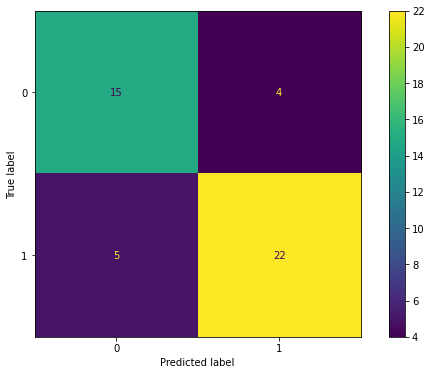

In [155]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [156]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  4]
 [ 5 22]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        19
           1       0.85      0.81      0.83        27

    accuracy                           0.80        46
   macro avg       0.80      0.80      0.80        46
weighted avg       0.81      0.80      0.81        46



In [157]:
eval_metric(knn_model,  X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[15  4]
 [ 5 22]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        19
           1       0.85      0.81      0.83        27

    accuracy                           0.80        46
   macro avg       0.80      0.80      0.80        46
weighted avg       0.81      0.80      0.81        46


Train_Set
[[103  16]
 [ 19 118]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       119
           1       0.88      0.86      0.87       137

    accuracy                           0.86       256
   macro avg       0.86      0.86      0.86       256
weighted avg       0.86      0.86      0.86       256



#### - Elbow Method for Choosing Reasonable K Values

In [158]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [159]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

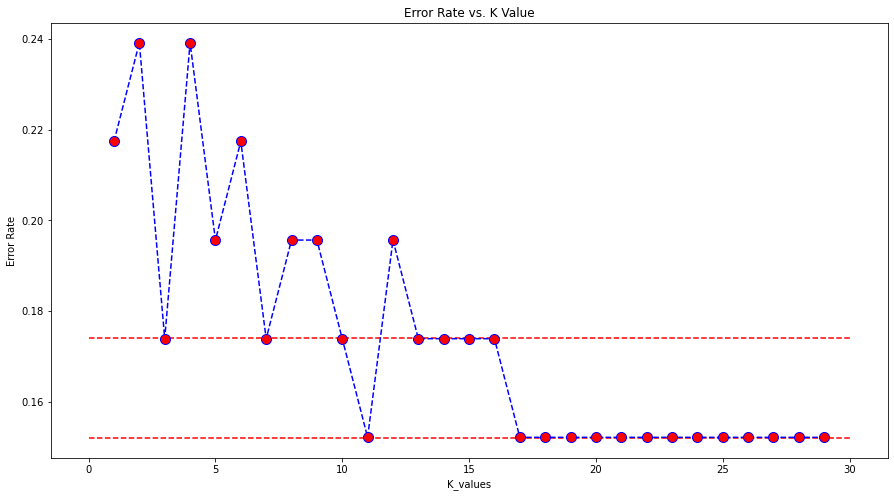

In [162]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.152, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.174, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [204]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train_scaled,y_train)
print('WITH K=10\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=10

Test_Set
[[16  3]
 [ 5 22]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.88      0.81      0.85        27

    accuracy                           0.83        46
   macro avg       0.82      0.83      0.82        46
weighted avg       0.83      0.83      0.83        46


Train_Set
[[100  19]
 [ 16 121]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       119
           1       0.86      0.88      0.87       137

    accuracy                           0.86       256
   macro avg       0.86      0.86      0.86       256
weighted avg       0.86      0.86      0.86       256



In [163]:
knn = KNeighborsClassifier(n_neighbors = 11)

knn.fit(X_train_scaled,y_train)
print('WITH K=10\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=10

Test_Set
[[17  2]
 [ 5 22]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        19
           1       0.92      0.81      0.86        27

    accuracy                           0.85        46
   macro avg       0.84      0.85      0.85        46
weighted avg       0.86      0.85      0.85        46


Train_Set
[[101  18]
 [ 23 114]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       119
           1       0.86      0.83      0.85       137

    accuracy                           0.84       256
   macro avg       0.84      0.84      0.84       256
weighted avg       0.84      0.84      0.84       256



#### Elbow Method for Choosing Reasonable K Values

In [205]:
model = KNeighborsClassifier(n_neighbors = 3)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.002,0.008,0.808,0.765,0.929,0.839
2,0.001,0.005,0.538,0.600,0.429,0.500
3,0.001,0.006,0.731,0.706,0.857,0.774
4,0.001,0.007,0.885,0.867,0.929,0.897
5,0.001,0.007,0.808,0.846,0.786,0.815
6,0.001,0.005,0.769,0.900,0.643,0.750
7,0.001,0.005,0.760,0.733,0.846,0.786
8,0.001,0.004,0.800,0.900,0.692,0.783
9,0.001,0.004,0.840,0.909,0.769,0.833
10,0.000,0.006,0.960,0.933,1.000,0.966


In [206]:
df_scores.mean()[2:]

test_accuracy    0.790
test_precision   0.816
test_recall      0.788
test_f1          0.794
dtype: float64

In [207]:
model = KNeighborsClassifier(n_neighbors = 11)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.001,0.011,0.846,0.812,0.929,0.867
2,0.001,0.007,0.731,0.818,0.643,0.720
3,0.001,0.006,0.808,0.765,0.929,0.839
4,0.001,0.005,0.923,0.929,0.929,0.929
5,0.000,0.006,0.846,0.917,0.786,0.846
6,0.001,0.008,0.808,0.909,0.714,0.800
7,0.001,0.007,0.720,0.714,0.769,0.741
8,0.001,0.006,0.680,0.692,0.692,0.692
9,0.001,0.005,0.800,0.900,0.692,0.783
10,0.001,0.005,0.960,1.000,0.929,0.963


In [208]:
df_scores.mean()[2:]

test_accuracy    0.812
test_precision   0.846
test_recall      0.801
test_f1          0.818
dtype: float64

#### - Gridsearch Method for Choosing Reasonable K Values

In [169]:
knn_grid = KNeighborsClassifier()

In [170]:
k_values= range(1,30)

In [171]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [172]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [173]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [174]:
knn_grid_model.best_params_

{'n_neighbors': 18, 'p': 2, 'weights': 'uniform'}

In [176]:
print('WITH K=18\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=18

Test_Set
[[17  2]
 [ 5 22]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        19
           1       0.92      0.81      0.86        27

    accuracy                           0.85        46
   macro avg       0.84      0.85      0.85        46
weighted avg       0.86      0.85      0.85        46


Train_Set
[[100  19]
 [ 23 114]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       119
           1       0.86      0.83      0.84       137

    accuracy                           0.84       256
   macro avg       0.84      0.84      0.84       256
weighted avg       0.84      0.84      0.84       256



In [177]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[15  4]
 [ 3 24]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.86      0.89      0.87        27

    accuracy                           0.85        46
   macro avg       0.85      0.84      0.84        46
weighted avg       0.85      0.85      0.85        46


Train_Set
[[ 95  24]
 [ 16 121]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       119
           1       0.83      0.88      0.86       137

    accuracy                           0.84       256
   macro avg       0.85      0.84      0.84       256
weighted avg       0.84      0.84      0.84       256



# Visually compare models based on your chosen metric

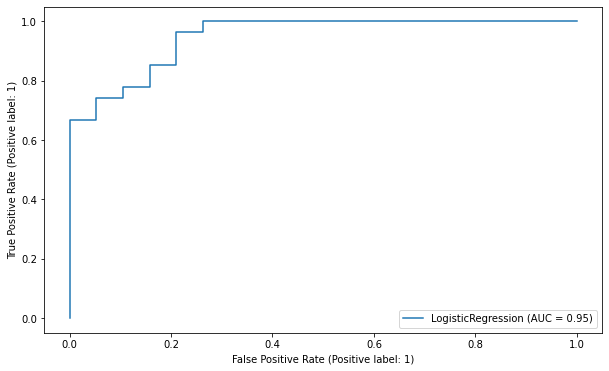

In [178]:
plot_roc_curve(log_model, X_test_scaled, y_test);

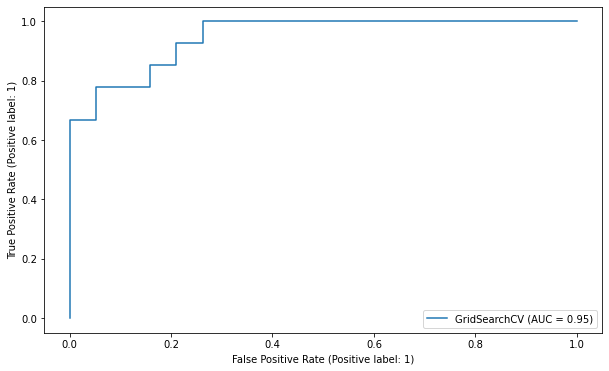

In [179]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

- çevresindeki gözlemlere neden köşeli çıktı çünkü çevresindekilerin ort aldıgı için. (Hocamın biri discrete dedi oldugundan dolayı dedi)

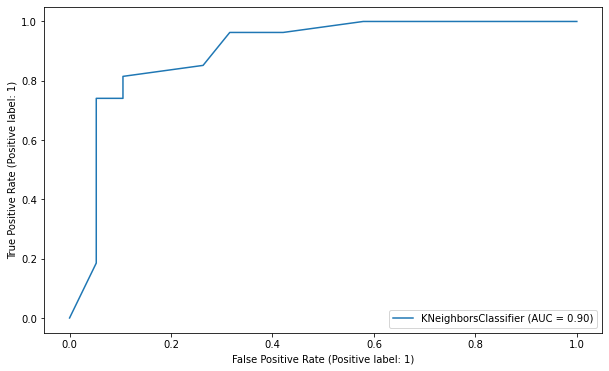

In [180]:
plot_roc_curve(knn, X_test_scaled, y_test)

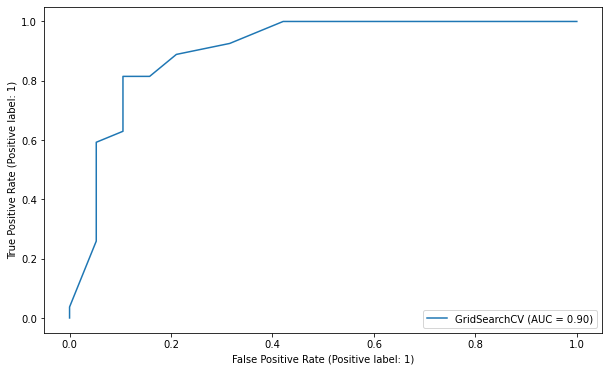

In [181]:
plot_roc_curve(knn_grid_model, X_test_scaled, y_test)

note: logistic regression model başarısı daha iyi oldugu için final model olarak logistic i seçtim.

# Chose best model and make a random prediction 

- logistic regression da model başarısı daha yüksek.

In [199]:
X_scaled = scaler.transform(X)

In [200]:
{'C': 1.8329807108324356,
 'class_weight': None,
 'penalty': 'l1',
 'solver': 'liblinear'}

{'C': 1.8329807108324356,
 'class_weight': None,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [201]:
final_model = LogisticRegression(penalty="l1", C = 1.833, class_weight = None, solver= "liblinear").fit(X_scaled, y)

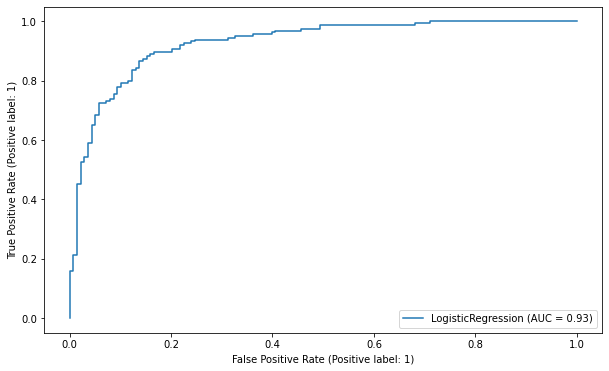

In [202]:
plot_roc_curve(final_model, X_scaled, y);

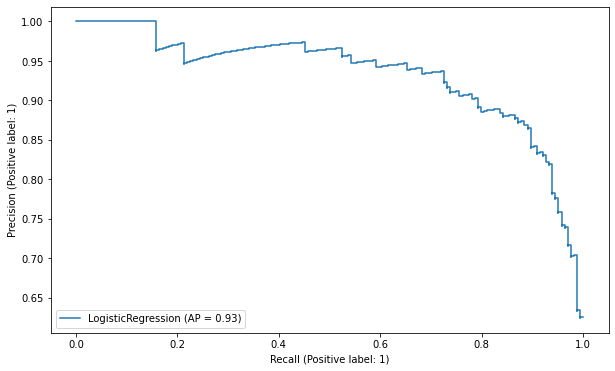

In [203]:
plot_precision_recall_curve(final_model, X_scaled, y);

In [186]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_1,thal_2,thal_normal
0,63,1,145,233,1,150,0,2.300,0,1,0,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.500,0,1,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.400,0,1,1,0,0,0,1,1,0,0,1,0
3,56,1,120,236,0,178,0,0.800,0,1,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.600,0,1,0,0,1,0,0,1,0,0,1,0


In [214]:
my_dict = {'age': [63, 20 ,38, 42, 56, 75, 82, 12, 34, 59],
           'trestbps': [1, 131, 136, 140, 120, 150, 175, 172, 192, 100],
           'chol': [145, 148, 154, 196, 306, 448, 211, 346, 460, 500],
           'thalach': [233, 200, 158, 95, 78, 186, 195, 148, 200, 98],
           'oldpeak': [1, 4.5, 0.7, 2.4, 3.7, 4.2, 5.7, 0.7, 6.1, 1.0],
           'ca' : [150, 1.0, 4.0, 0.0, 4.0, 3.0, 2.0, 3.0, 1.0, 0.0],
           'sex_1': [0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0],
           'cp_1': [2.3, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0],
           'cp_2': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0],
           'cp_3': [1, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
           'fbs_1': [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
           'restecg_1': [0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0],
           'restecg_2': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0],
           'exang_1': [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0],
           'slope_1': [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0],
           'slope_2': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
           'thal_1': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
           'thal_2': [1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
           'thal_3': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]}

In [215]:
sample = pd.DataFrame(my_dict)
sample

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,145,233,1.000,150.000,0.000,2.300,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
1,20,131,148,200,4.500,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000
2,38,136,154,158,0.700,4.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000
3,42,140,196,95,2.400,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
4,56,120,306,78,3.700,4.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000
5,75,150,448,186,4.200,3.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000
6,82,175,211,195,5.700,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000
7,12,172,346,148,0.700,3.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000
8,34,192,460,200,6.100,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
9,59,100,500,98,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000


In [216]:
sample_scaled = scaler.transform(sample)
sample_scaled

array([[ 7.23404255e-01,  1.00000000e+00,  4.81132075e-01,
         2.44292237e-01,  1.00000000e+00,  6.03053435e-01,
         0.00000000e+00,  3.70967742e-01,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [-1.91489362e-01,  1.31000000e+02,  5.09433962e-01,
         1.68949772e-01,  4.50000000e+00, -5.34351145e-01,
         0.00000000e+00,  1.61290323e-01,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [ 1.91489362e-01,  1.36000000e+02,  5.66037736e-01,
         7.30593607e-02,  7.00000000e-01, -5.11450382e-01,
         1.00000000e+00,  0.00000000e+00,  2.50000000e-01,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
    

In [217]:
predictions = final_model.predict(sample_scaled) 
predictions_proba = final_model.predict_proba(sample_scaled)

In [218]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred"] = predictions
sample

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,pred_proba,pred
0,63,1,145,233,1.000,150.000,0.000,2.300,0.000,1.000,...,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.861,1
1,20,131,148,200,4.500,1.000,0.000,1.000,0.000,0.000,...,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0
2,38,136,154,158,0.700,4.000,1.000,0.000,1.000,0.000,...,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0
3,42,140,196,95,2.400,0.000,0.000,1.000,0.000,0.000,...,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0
4,56,120,306,78,3.700,4.000,1.000,1.000,0.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0
5,75,150,448,186,4.200,3.000,1.000,0.000,0.000,1.000,...,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0
6,82,175,211,195,5.700,2.000,0.000,1.000,0.000,0.000,...,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0
7,12,172,346,148,0.700,3.000,1.000,0.000,1.000,0.000,...,0.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0
8,34,192,460,200,6.100,1.000,0.000,1.000,0.000,0.000,...,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0
9,59,100,500,98,1.000,0.000,0.000,0.000,1.000,0.000,...,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0
